# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset is a classic dataset used for clustering tasks. It consists of many samples of wine. Here are the key features and characteristics of the dataset:

##### Features (13 chemical properties):
1. Alcohol: The percentage of alcohol in the wine.
2. Malic acid: A type of acid found in grapes, contributing to wine’s tartness.
3. Ash: The total amount of non-volatile substances left after burning the wine
4. Alcalinity of ash: Measures the alkalinity of the ash component of wine.
5. Magnesium: The amount of magnesium in the wine (measured in mg/L).
6. Total phenols: Represents the total amount of phenolic compounds in wine.
7. Flavanoids: A type of phenolic compound responsible for bitterness and astringency.
8. Nonflavanoid phenols: Phenolic compounds that are not flavonoids.
9. Proanthocyanins: A type of tannin that affects astringency and bitterness.
10. Color intensity: Measures the depth or intensity of the wine’s color. 
11. Hue: The shade of color in the wine (ratio of red to yellow tones).
12. OD280/OD315 of diluted wines: Measures the wine’s absorbance at 280 nm and 315 nm, indicating phenol concentration.
13. Proline: An amino acid found in wine, often associated with aging potential and quality.

In [13]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Wine dataset:

Use scikit-learn to load the Wine dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [14]:
from sklearn.datasets import load_wine
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Display the DataFrame
print(wine_df)

# Your code here...
num_rows = len(wine_df)          # or df.shape[0]
num_columns = len(wine_df.columns)  # or df.shape[1]

print(f"There are Observations(rows): {num_rows}")
print(f"There are Features(columns): {num_columns}")

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (e.g., alcohol, malic acid, ash...).


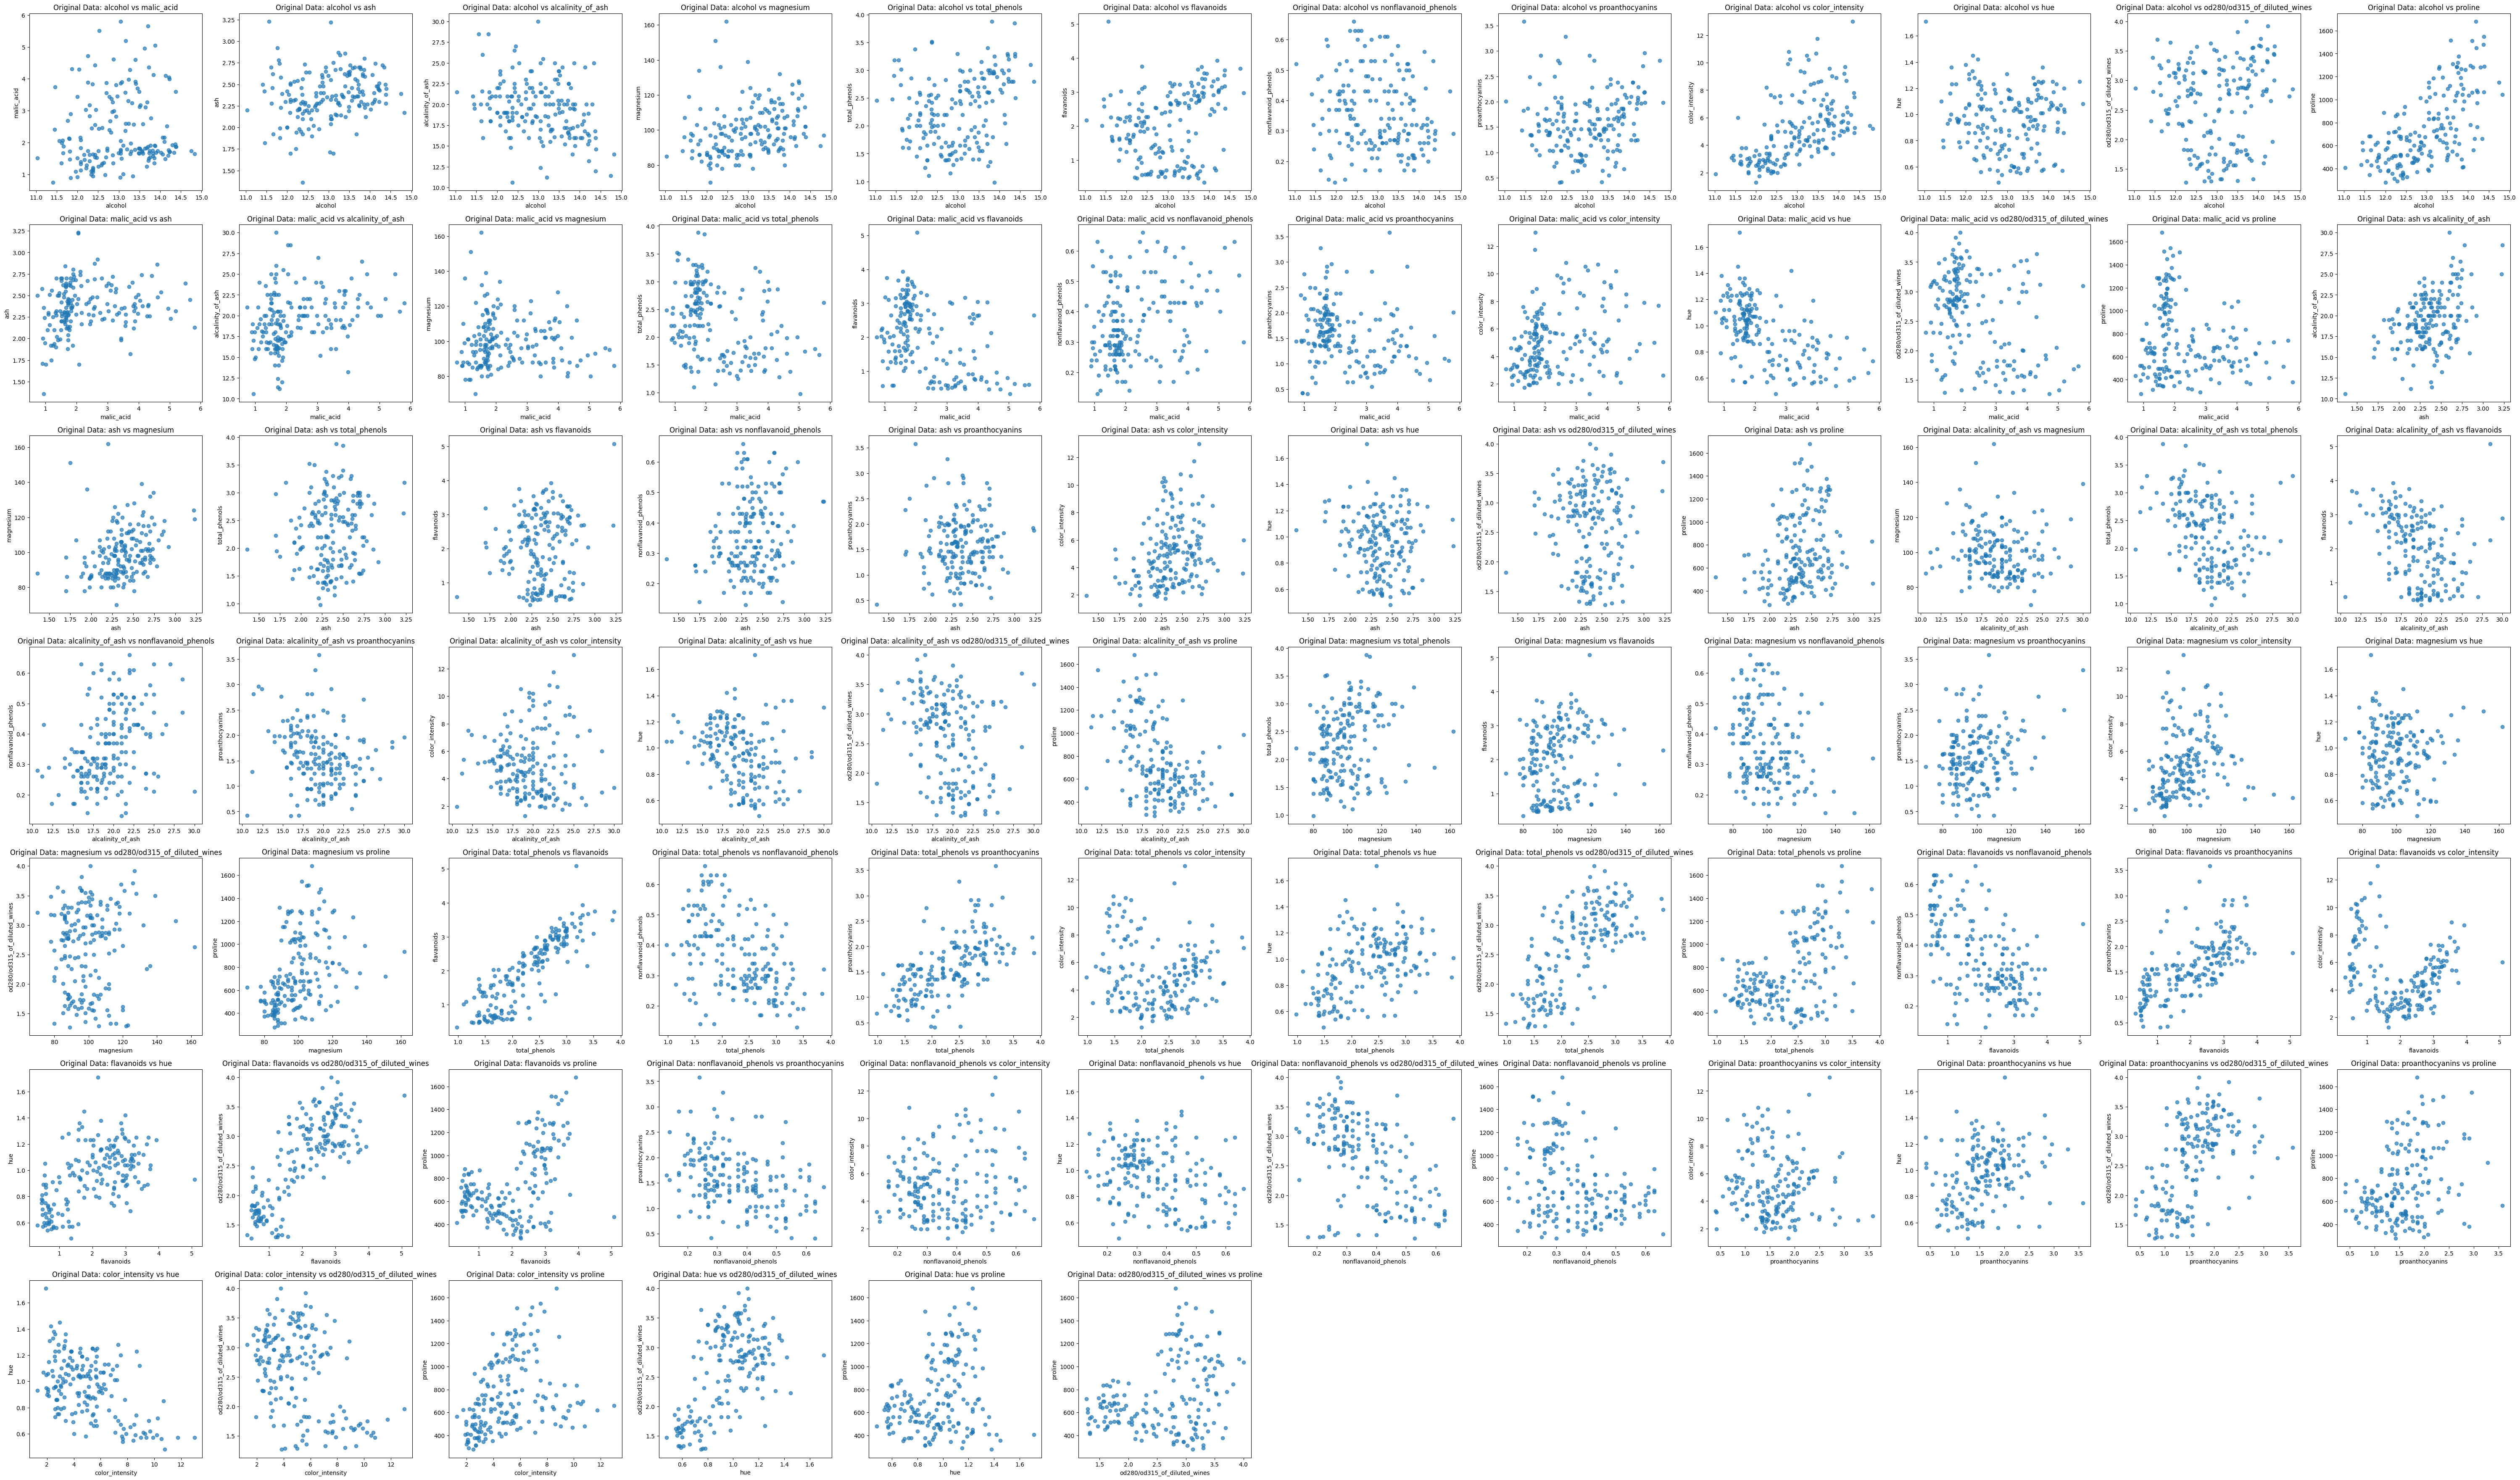

In [15]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = wine_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(wine_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Your answer...
# There are four patterns between the different features. 
# Pattern 1 : flavanoids, total_phenols, and od280/od315_of_diluted_wines. These features seem very highly correlated with each other. A wine high in one is typically high in all of them. These features are related to phenol. Phenolic compounds are natural antioxidants and are major contributors to a wine's mouthfeel, bitterness, color, and antioxidant potential. The concentration is heavily influenced by grape variety, growing conditions, and winemaking techniques.This provides insights into both the grouping structure of the wines (unsupervised learning) and the reliability of our feature estimates (inferential statistics).
# Pattern2 : Ash, Alcalinity of Ash, Magnesium. Ash and Alcalinity of Ash are highly correlated as it may presents type of soil for growing grapes. Alcalinity of Ash measures the potassium content, which is often anti-correlated with Magnesium. This reflects the mineral composition of the soil where the grapes were grown. This may help us to identify the original region of the grapes and where are they from.

#### **Question 3:** 
#### Data cleaning

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(wine_df)

# Create a new DataFrame with scaled features
scaled_wine_df = pd.DataFrame(scaled_features, columns=wine_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ... 
# Standardization puts all features on an equal footing, allowing the distance metric to meaningfully incorporate information from all variables, which is a prerequisite for obtaining accurate and interpretable cluster. As K-Means relies on distance calculation and it treats all directions equally(Isotropic). It works fundamentally by calculating the Euclidean distance between data points and cluster centroids to assign points to the nearest cluster; and the algorithm assumes that all features (dimensions) are equally important. A unit of change in one feature is treated the same as a unit of change in any other feature. Using unstandardized data creates bias to the data feature where data with larger scale would have more impact on the analysis or dominate the distance calculation which will not reflect the true, multidimensional structure of the data and the centroids are pulled towards high-scale features.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Wine dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [17]:
# Your answer...

clustered_wine_data = scaled_wine_df.copy()


# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to the original DataFrame
clustered_wine_data['cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print("\nDataFrame with cluster labels:")
print(clustered_wine_data.head())

# Show the distribution of data points across clusters
print("\nCluster distribution:")
print(clustered_wine_data['cluster'].value_counts().sort_index())


# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_wine_data, feature_names, color_labels=clustered_wine_data['cluster'], title_prefix='Clustered Data: ')


DataFrame with cluster labels:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  cluster  
0         0.251717  0.362177                      1.847920

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...
# Elbow Method is commonly used to determin the optimal number of clustersin K-means clustering.It involves running the K-means algorithm for a range of value of K and calculating the within-cluster sum of squares (WCSS) for each results. A lower WCSS means points are closer to their centroids and indicating tighter clusters. The "Elbow" point is considered as the optimal k. As before the elbow, adding more clusters can improve convacity as WCSS decreases rapidly. While after the elbow, adding more clusters just leads to marginal improvement. The Elbow method helps to find the smallest k that has reasonably low WCSS within reasonable complexity.  

In [18]:
#find optimal value of K
wine_clust_ks = pd.DataFrame(columns = ["k","wssd"])
wine_clust_ks

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(scaled_features)
    current_k = pd.DataFrame({"k":[k], "wssd":[kmeans.inertia_]})
    wine_clust_ks = pd.concat([wine_clust_ks, current_k], ignore_index=True)
wine_clust_ks    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wine_clust_ks['k'], wine_clust_ks['wssd'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSSD)')
plt.title('Elbow Method for Optimal k on wine dataset')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\lionl\AppData\Local\Temp\ipykernel_20096\1105326836.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wine_clust_ks = pd.concat([wine_clust_ks, current_k], ignore_index=True)


#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of `color intensity`. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

Original sample mean of color_intensity: 5.0581
Mean of Color Intensity: 5.058089882022472
90% Confidence Interval of Mean Color Intensity: (4.771441000561798, 5.346637640449438)


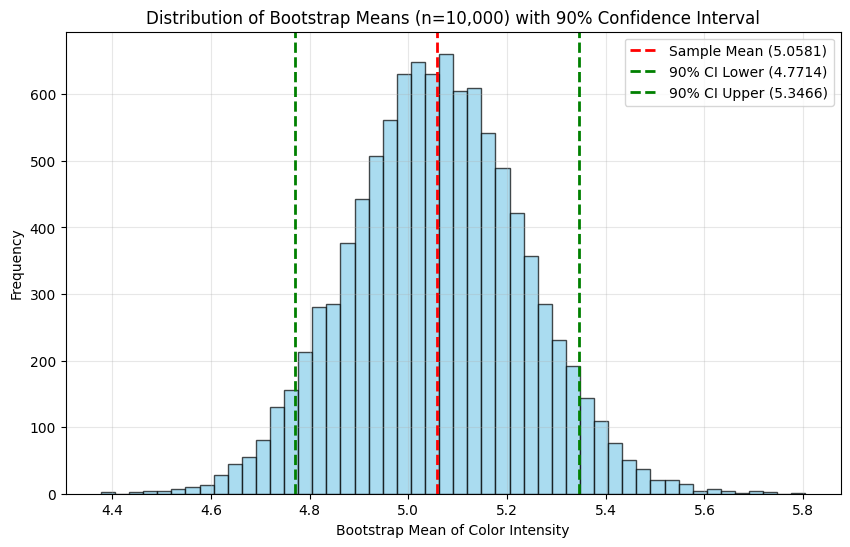


Bootstrap Mean of Means: 5.06
Bootstrap Standard Error: 0.18


In [19]:
# Your answer here...



# Extract the 'color_intensity' feature
color_intensity = wine_df['color_intensity'].values
mean_color_intensity =  np.mean(color_intensity)
print(f"Original sample mean of color_intensity: {mean_color_intensity:.4f}")

# Set parameters for bootstrapping
n_bootstraps = 10000
bootstrap_means = np.zeros(n_bootstraps)

# Generate bootstrap samples and compute their means
np.random.seed(42)  # For reproducibility
for i in range(n_bootstraps):
    # Create a bootstrap sample (with replacement)
    bootstrap_sample = np.random.choice(color_intensity, size=len(color_intensity), replace=True)
    # Calculate the mean for this bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 90% confidence interval (5th and 95th percentiles)
lower_bound = np.percentile(bootstrap_means, 5)
upper_bound = np.percentile(bootstrap_means, 95)

# Display the result
print(f"Mean of Color Intensity: {mean_color_intensity}")
print(f"90% Confidence Interval of Mean Color Intensity: ({lower_bound}, {upper_bound})")


# Visualize the bootstrap distribution and confidence interval
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_color_intensity, color='red', linestyle='--', linewidth=2, label=f'Sample Mean ({mean_color_intensity:.4f})')
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'90% CI Lower ({lower_bound:.4f})')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'90% CI Upper ({upper_bound:.4f})')
plt.xlabel('Bootstrap Mean of Color Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Means (n=10,000) with 90% Confidence Interval')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Additional statistics
print(f"\nBootstrap Mean of Means: {np.mean(bootstrap_means):.2f}")
print(f"Bootstrap Standard Error: {np.std(bootstrap_means):.2f}")





**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...
# since it's not possible to have the full data as there are so many wines and from different geography region, the bootstrapping helps us to utilize the sample data that we have to create as many artifical samples as we like to come up with possible distribution statistic. Based on the bootstrap histogram we can visualize the relationship and the confidence interval provides the possible population mean range, and from the standard diviation we can decide whether the conclusion is reliable.  

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...
# The confidence invertal helps us to quantify the uncertainty and precision of our estimate in a way that is intuitive and directly tied to the data we have. It gives us the pausible range instead of just one single mean. It tells us about how relialable we can predict the outcome. The CI gives a realistic range of possible outcomes.
# The confidence interval directly quantifies the variability. A narrow confidence interval means that the bootstrap means were all very close to the original mean and low variability.Therefore our sample mean is a very precise estimate to the true mean and we can be highly confident that the true mean is very close to our calculated value. A wide confidence interval then suggests the opposite: that our sample mean is imprecise and the true mean is significantly different from the sample mean. 

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the color intensity appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...
# The bootstrap color intensity mean gives us a range of 4.77 and 5.35. The mean of the color intensity appears to be a stable and reliable estimate with interval range 5.35-4.77=0.58, the bootstrap standard error of 0.18 or relative standard error of 0.18/5.06=3.6% which is less than 5%. This is a very small relative error. 

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are correctly interpreted to explore relationships between features and species. | Visualizations are not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 09/21/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
